<a href="https://colab.research.google.com/github/SofiaProkopchuk/SofiaProkopchuk/blob/main/RiboSeq_HW_Prokopchuk_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
getwd()
getOption("repos")

[1] "/content"

CRAN 
"https://cran.rstudio.com"

#Пакеты

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(stringr)
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.16")
BiocManager::install("apeglm")
library(apeglm)
BiocManager::install("DESeq2")
library("DESeq2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'BiocVersion'

Old packages: 'bit', 'broom', 'bslib', 'cli', 'data.table', 'devtools',
  'digest', 'evaluate', 'gert', 'highr', 'htmltools', 'isoband', 'jsonlite',
  'knitr', 'openssl', 'pkgload', 'purrr', 'rmarkdown', 'roxygen2', 'sass',
  'stringr', 'testthat', 'tidyverse', 'tinytex', 'vctrs', 'whisker', 'xfun',
  'boot', 'foreign', 'nlme'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details



#Data

In [47]:
df <-  read.table('01. RiboSeq_RNASeq_HCC_counts.tsv', header = T, sep='')
df_clean  <-  df %>% 
  select(-c(geneID, geneSymbol)) %>% 
  mutate_all(~replace(., is.na(.), 0))

df_cpm  <-  sapply(df_clean, cpm) #матрица каунтов на миллион

In [48]:
df

geneID,geneSymbol,LC001.normal.RPF,LC001.tumor.RPF,LC001.normal.RNA,LC001.tumor.RNA,LC033.normal.RPF,LC033.tumor.RPF,LC033.normal.RNA,LC033.tumor.RNA,⋯,LC507.normal.RNA,LC507.tumor.RNA,LC508.normal.RPF,LC508.tumor.RPF,LC508.normal.RNA,LC508.tumor.RNA,LC509.normal.RPF,LC509.tumor.RPF,LC509.normal.RNA,LC509.tumor.RNA
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.14,TSPAN6,0,0,402,873,0,0,301,1627,⋯,218,457,0,0,200,889,0,0,161,857
ENSG00000000005.5,TNMD,0,0,0,1,0,0,0,1,⋯,0,0,1,0,0,0,0,0,0,NA
ENSG00000000419.12,DPM1,168,239,88,187,114,439,66,201,⋯,92,170,109,357,60,244,141,173,56,83
ENSG00000000457.13,SCYL3,65,121,60,106,36,163,70,156,⋯,127,176,67,176,55,261,64,100,68,176
ENSG00000000460.16,C1orf112,8,43,18,70,16,76,4,63,⋯,124,437,7,167,34,201,6,61,9,58
ENSG00000000938.12,FGR,0,6,19,9,14,13,61,24,⋯,94,13,3,9,42,26,7,10,26,57
ENSG00000000971.15,CFH,20021,1902,5339,443,18200,34652,3956,9324,⋯,2824,5456,24558,12238,4117,3431,19747,27766,3011,6181
ENSG00000001036.13,FUCA2,195,802,199,432,124,871,128,424,⋯,318,501,156,1633,160,1011,153,284,95,186
ENSG00000001084.10,GCLC,435,677,641,797,447,4130,536,3757,⋯,695,1677,469,355,822,300,448,414,453,679


In [49]:
head(df_clean)

,LC001.normal.RPF,LC001.tumor.RPF,LC001.normal.RNA,LC001.tumor.RNA,LC033.normal.RPF,LC033.tumor.RPF,LC033.normal.RNA,LC033.tumor.RNA,LC034.normal.RPF,LC034.tumor.RPF,⋯,LC507.normal.RNA,LC507.tumor.RNA,LC508.normal.RPF,LC508.tumor.RPF,LC508.normal.RNA,LC508.tumor.RNA,LC509.normal.RPF,LC509.tumor.RPF,LC509.normal.RNA,LC509.tumor.RNA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,402,873,0,0,301,1627,0,0,⋯,218,457,0,0,200,889,0,0,161,857
2,0,0,0,1,0,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,0
3,168,239,88,187,114,439,66,201,325,117,⋯,92,170,109,357,60,244,141,173,56,83
4,65,121,60,106,36,163,70,156,130,76,⋯,127,176,67,176,55,261,64,100,68,176
5,8,43,18,70,16,76,4,63,44,14,⋯,124,437,7,167,34,201,6,61,9,58
6,0,6,19,9,14,13,61,24,15,62,⋯,94,13,3,9,42,26,7,10,26,57


In [50]:
head(df_cpm)

LC001.normal.RPF,LC001.tumor.RPF,LC001.normal.RNA,LC001.tumor.RNA,LC033.normal.RPF,LC033.tumor.RPF,LC033.normal.RNA,LC033.tumor.RNA,LC034.normal.RPF,LC034.tumor.RPF,⋯,LC507.normal.RNA,LC507.tumor.RNA,LC508.normal.RPF,LC508.tumor.RPF,LC508.normal.RNA,LC508.tumor.RNA,LC509.normal.RPF,LC509.tumor.RPF,LC509.normal.RNA,LC509.tumor.RNA
0.000000,0.000000,90.600227,179.8681585,0.000000,0.000000,80.378639,290.386891,0.000000,0.000000,⋯,45.65337,88.660635,0.0000000,0.000000,46.778833,145.009945,0.000000,0.000000,48.841219,150.341329
0.000000,0.000000,0.000000,0.2060345,0.000000,0.000000,0.000000,0.178480,0.000000,0.000000,⋯,0.00000,0.000000,0.2050456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29.925912,56.140516,19.832885,38.5284601,23.885265,49.163025,17.624552,35.874471,26.133408,34.374579,⋯,19.26656,32.980980,22.3499656,51.647819,14.033650,39.800255,27.386761,32.582707,16.988250,14.560479
11.578478,28.422604,13.522422,21.8396619,7.542715,18.254153,18.692707,27.842873,10.453363,22.328787,⋯,26.59623,34.145015,13.7380523,25.462230,12.864179,42.573223,12.430870,18.833935,20.628590,30.875232
1.425043,10.100595,4.056727,14.4224182,3.352318,8.511139,1.068155,11.244237,3.538061,4.113198,⋯,25.96797,84.780519,1.4353189,24.160184,7.952402,32.786276,1.165394,11.488700,2.730254,10.174792
0.000000,1.409385,4.282100,1.8543109,2.933278,1.455853,16.289359,4.283519,1.206157,18.215589,⋯,19.68540,2.522075,0.6151367,1.302046,9.823555,4.241011,1.359626,1.883393,7.887402,9.999365


#1.1.Коэффициент корреляции числа каунтов
Найдем корреляцию для каждого гена и визуализируем результат

Я не уверена, что у нас тут линейная зависимость, и поэтому лучше выбрать корреляцию Спирмана 

In [51]:
rib_col <- which(grepl('RPF', colnames(df_cpm)))
rna_col <- which(grepl('RNA', colnames(df_cpm)))

In [52]:
gen_corr <-  data.frame(geneID = df$geneID, geneSymbol = df$geneSymbol,
  coeff = apply(df_cpm, 1,function(x) cor(x[rib_col],x[rna_col], method ='spearman')))

Warning message in cor(x[rib_col], x[rna_col], method = "spearman"):
“the standard deviation is zero”
Warning message in cor(x[rib_col], x[rna_col], method = "spearman"):
“the standard deviation is zero”
Warning message in cor(x[rib_col], x[rna_col], method = "spearman"):
“the standard deviation is zero”
Warning message in cor(x[rib_col], x[rna_col], method = "spearman"):
“the standard deviation is zero”
Warning message in cor(x[rib_col], x[rna_col], method = "spearman"):
“the standard deviation is zero”
Warning message in cor(x[rib_col], x[rna_col], method = "spearman"):
“the standard deviation is zero”
Warning message in cor(x[rib_col], x[rna_col], method = "spearman"):
“the standard deviation is zero”
Warning message in cor(x[rib_col], x[rna_col], method = "spearman"):
“the standard deviation is zero”
Warning message in cor(x[rib_col], x[rna_col], method = "spearman"):
“the standard deviation is zero”
Warning message in cor(x[rib_col], x[rna_col], method = "spearman"):
“the standard

#1.2.Гистограмма распределения коэффициентов корреляции

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2086 rows containing non-finite values (`stat_bin()`).”


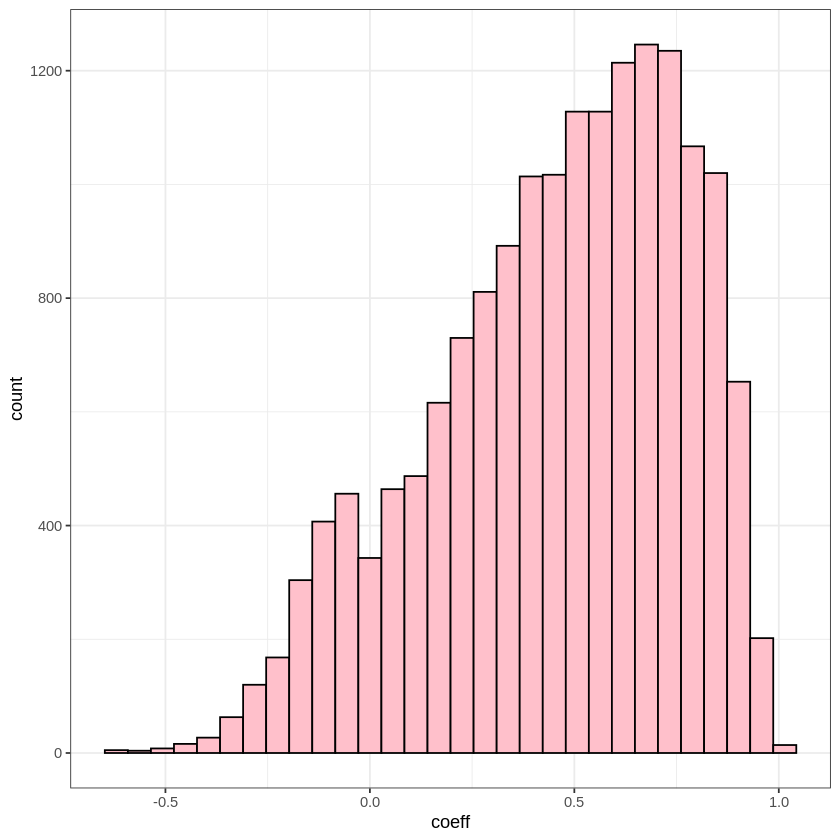

In [ ]:
gen_corr %>% 
  ggplot(aes(coeff))+
  geom_histogram(fill = 'pink', col = 'black')+
  theme_bw()

In [ ]:
gen_corr[which(gen_corr$coeff< -0.6), ] #гены с наименьшими коэффициентом корреляции
gen_corr[which(gen_corr$coeff > 0.95), ] #гены с наибольшим коэффициентом корреляции

,geneID,geneSymbol,coeff
,<chr>,<chr>,<dbl>
5619,ENSG00000125843.10,AP5S1,-0.6120301
11883,ENSG00000167874.6,TMEM88,-0.6346543
13995,ENSG00000179476.7,C14orf28,-0.6299177
14063,ENSG00000179965.11,ZNF771,-0.6174706


,geneID,geneSymbol,coeff
,<chr>,<chr>,<dbl>
43,ENSG00000003989.16,SLC7A2,0.9729323
129,ENSG00000006327.13,TNFRSF12A,0.9518797
439,ENSG00000025423.11,HSD17B6,0.9669173
1165,ENSG00000072080.10,SPP2,0.9593985
1209,ENSG00000073111.13,MCM2,0.9563910
1229,ENSG00000073754.5,CD5L,0.9624060
1458,ENSG00000079557.4,AFM,0.9609023
1599,ENSG00000083857.13,FAT1,0.9669173
1864,ENSG00000090512.11,FETUB,0.9609023


Кол-во мРНК не всегда то же самое, что и кол-во белка. На некоторые мРНК рибосома не садится, а значит не происходит трансляция, у таких генов, где трансляция происходит меньше, корреляция будет низкая

#1.3.Распределение каунтов Ribo-seq

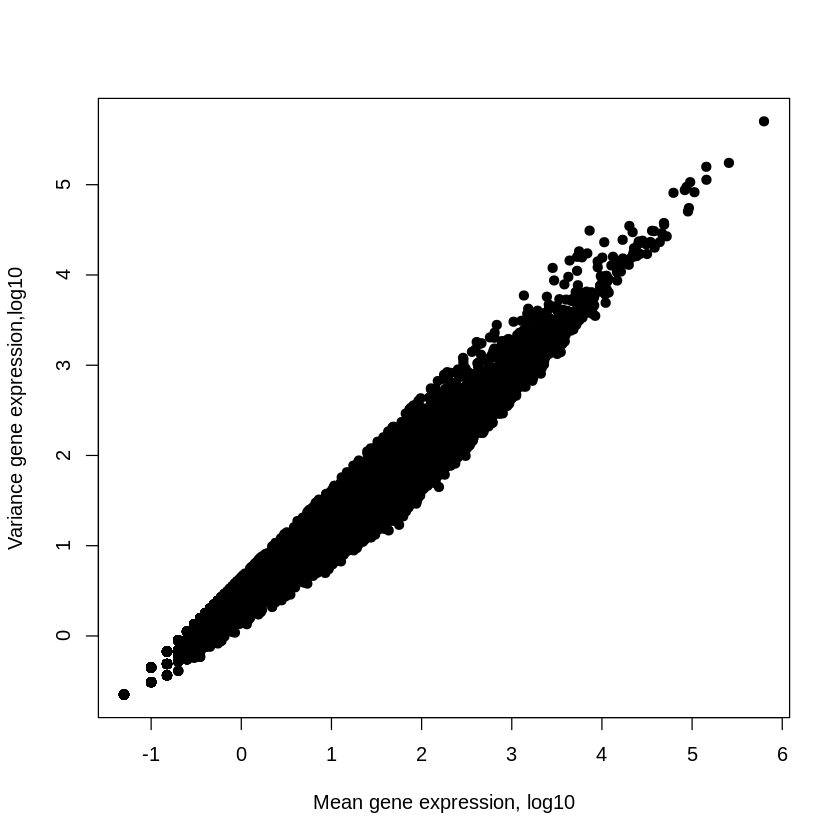

In [ ]:
m_r <- apply(df_clean[, rib_col], 1, mean)
sd_r <- apply(df_clean[, rib_col], 1, sd)
plot(log10(m_r),log10(sd_r), pch = 19, col='black',
     xlab='Mean gene expression, log10', ylab='Variance gene expression,log10')

Кажется, как будто не очень похоже на NB-распределение 

#1.4. Deseq
##1.4.1. RNA-Seq дифференциальня экспрессия 

In [ ]:
colnames(df_clean[, rna_col])
rep(c('normal', 'tumor'), 10)
matr_rna <- data.frame(condition = rep(c('normal', 'tumor'), 10), 
                   row.names = colnames(df_clean[, rna_col]))

[1] "LC001.normal.RNA" "LC001.tumor.RNA"  "LC033.normal.RNA" "LC033.tumor.RNA" 
 [5] "LC034.normal.RNA" "LC034.tumor.RNA"  "LC501.normal.RNA" "LC501.tumor.RNA" 
 [9] "LC502.normal.RNA" "LC502.tumor.RNA"  "LC505.normal.RNA" "LC505.tumor.RNA" 
[13] "LC506.normal.RNA" "LC506.tumor.RNA"  "LC507.normal.RNA" "LC507.tumor.RNA" 
[17] "LC508.normal.RNA" "LC508.tumor.RNA"  "LC509.normal.RNA" "LC509.tumor.RNA"

[1] "normal" "tumor"  "normal" "tumor"  "normal" "tumor"  "normal" "tumor" 
 [9] "normal" "tumor"  "normal" "tumor"  "normal" "tumor"  "normal" "tumor" 
[17] "normal" "tumor"  "normal" "tumor"

In [ ]:
ddf_rna <- DESeqDataSetFromMatrix(countData = df_clean[, rna_col], colData = matr_rna, design = model.matrix(~ matr_rna$condition))

converting counts to integer mode



In [ ]:
ddf_rna <-  DESeq(ddf_rna)

using supplied model matrix

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1242 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [ ]:
resultsNames(ddf_rna)
itog_rna <- results(ddf_rna, name = 'matr_rna.conditiontumor')
row.names(itog_rna) <- df$geneSymbol
itog_rna$padj[itog_rna$padj<0.05]

[1] "Intercept"               "matr_rna.conditiontumor"

[1] 3.815928e-02           NA 2.028246e-02 1.480259e-02 5.937700e-04
   [6] 2.397179e-03 7.385942e-04 1.029105e-02 3.863514e-05 3.302845e-02
  [11]           NA 6.738023e-03 2.866847e-03 9.990208e-03 4.284941e-04
  [16] 3.085593e-04 2.634877e-11           NA 4.914816e-02 8.830482e-04
  [21] 4.747069e-02 2.032133e-05 1.444907e-02 2.121081e-03 6.493145e-03
  [26] 1.854932e-03 2.703243e-09 4.794149e-04 2.842589e-02 1.234856e-02
  [31] 1.992472e-02 4.490938e-02 8.646431e-03 9.842979e-03 2.867380e-02
  [36] 4.125767e-02           NA 4.636923e-03 3.663413e-02 2.051235e-02
  [41]           NA 8.199181e-03 6.429257e-07 6.197928e-04 1.725968e-02
  [46]           NA 4.955791e-02 4.978915e-02           NA 2.113747e-02
  [51] 2.027964e-02 1.027556e-02           NA           NA 6.663031e-05
  [56] 2.375919e-02 8.878017e-03           NA 7.249081e-05 1.832643e-02
  [61] 2.859662e-04 1.991298e-03 1.496262e-02           NA 3.153334e-02
  [66] 7.263294e-03 2.338542e-03 8.139059e-03 1.694238e-02 1.177741e-03
  [71]           NA 2.774577e-02 9.416820e-06 1.342267e-02 2.174415e-06
  [76] 2.456382e-04 4.785833e-05           NA 3.299091e-03 2.761973e-02
  [81] 2.026395e-03 9.557285e-03 2.253407e-02 3.662334e-10 2.099441e-05
  [86] 1.633969e-03 4.785833e-05 1.462063e-04 4.826813e-02 1.652536e-04
  [91] 9.838605e-04 9.462778e-03 2.016262e-05 1.324722e-02 1.582316e-02
  [96] 3.766112e-02 1.515785e-03 1.539742e-02 1.524116e-02 1.257022e-02
 [101] 1.012738e-02 4.372558e-02 2.162358e-03 4.378634e-02 1.048909e-02
 [106] 2.979448e-02           NA 1.625873e-02           NA           NA
 [111] 7.437917e-04 4.029830e-13 2.271742e-02 4.442495e-03 2.360264e-04
 [116] 2.582877e-02 4.770255e-09 4.115393e-02 3.099993e-06 4.614488e-03
 [121] 1.213168e-03 4.633783e-04 1.856557e-05 8.891728e-03 2.307426e-05
 [126] 4.291393e-07 3.729805e-02           NA 4.430227e-02 8.248166e-03
 [131] 3.799658e-02 6.622594e-03 4.702097e-02 1.834954e-02 2.550885e-02
 [136] 1.150932e-04 7.567373e-06 3.091644e-02 2.587149e-02 2.019851e-02
 [141] 3.158661e-03 2.866847e-03 1.455846e-02 1.489096e-02 1.108344e-03
 [146] 1.557125e-03 3.343582e-05 3.594134e-02 1.817494e-02 6.808366e-05
 [151] 6.742371e-04 2.285150e-02 9.904548e-03 3.690865e-02 2.068880e-02
 [156] 4.728808e-03 1.304681e-05 8.626746e-03 6.045175e-03 1.712613e-07
 [161] 5.115871e-03 5.977002e-03 1.061898e-02 2.163800e-03 7.858530e-03
 [166] 4.102176e-02 7.899197e-03 3.055977e-02 2.585618e-03 5.058481e-03
 [171] 6.372742e-04 2.296280e-02 3.054133e-02 1.374946e-03 2.949340e-03
 [176] 2.230419e-02 1.153887e-14 1.078539e-02           NA 8.188851e-05
 [181]           NA           NA 3.892030e-02 5.857604e-03 3.602317e-05
 [186] 6.604454e-04 1.569836e-02 2.887770e-02 6.558282e-03 1.215898e-02
 [191] 5.291637e-03 4.451778e-02 3.920900e-05 2.770376e-02 7.143373e-07
 [196] 3.946036e-03 1.268905e-02 2.645747e-04 1.949172e-02 7.179702e-05
 [201]           NA 1.160803e-04 7.517628e-03 3.049555e-03 5.287775e-05
 [206] 2.466940e-03 3.714381e-03 3.364822e-02 5.764268e-05 2.219157e-05
 [211] 8.515396e-04 6.989777e-03 2.439174e-03 1.405593e-02 1.575191e-02
 [216] 2.029877e-05 2.272181e-02 3.165176e-02 1.587037e-02 9.414952e-03
 [221] 2.039803e-03 8.081063e-03           NA 2.608219e-03 2.023236e-02
 [226] 1.013404e-04 1.948935e-06 6.708620e-03           NA 3.461217e-02
 [231] 1.518434e-02 3.229266e-02 3.720672e-04 2.087664e-04 8.233118e-03
 [236] 3.573552e-03 4.274145e-04 3.553777e-02 5.058481e-03           NA
 [241] 3.655466e-02 2.372663e-03 2.809387e-02 3.329110e-02 2.604617e-08
 [246] 1.966056e-04 4.040587e-04 9.551157e-04 2.929509e-03 8.736964e-06
 [251] 4.666382e-02 2.787800e-02 2.162552e-02 4.584935e-03 7.718355e-03
 [256] 9.786114e-04 7.580494e-04           NA 4.441351e-05 2.740523e-03
 [261] 1.686499e-02 1.076762e-03 3.496408e-05 2.887770e-02 2.873062e-02
 [266] 2.222873e-02 2.926553e-02 2.421114e-03 1.309648e-02 2.071532e-03
 [271] 2.822250e-02 4.249095e-03 5.643115e-03 1.051036e-02 2.752072e-05
 [276] 3.020889e-02 4.781511e-02 7.385797e-

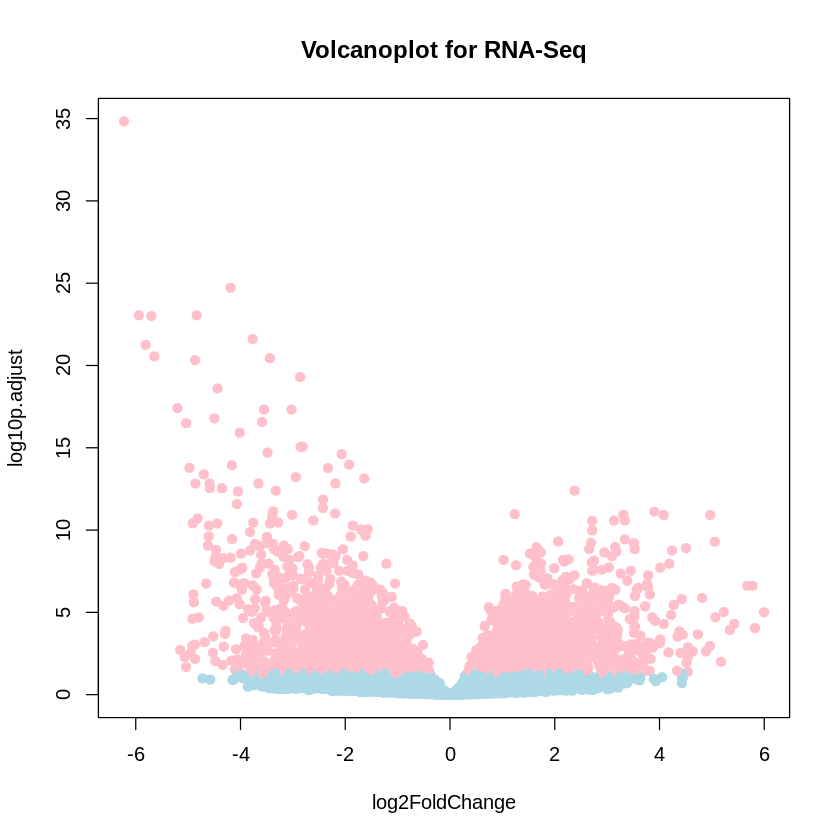

In [ ]:
alpha<--log10(0.05)
col <- ifelse(-log10(itog_rna$padj)>alpha,'pink','lightblue')
plot(x=itog_rna$log2FoldChange,y=-log10(itog_rna$padj),
     pch=19, col=col,xlab='log2FoldChange', ylab='log10p.adjust',
     main='Volcanoplot for RNA-Seq')


Список диф экспрессированных генов

In [53]:
rna <- df_clean[,rna_col]
row.names(rna) <- df$geneID
na.omit(rna[itog_rna$padj<0.05,])

,LC001.normal.RNA,LC001.tumor.RNA,LC033.normal.RNA,LC033.tumor.RNA,LC034.normal.RNA,LC034.tumor.RNA,LC501.normal.RNA,LC501.tumor.RNA,LC502.normal.RNA,LC502.tumor.RNA,LC505.normal.RNA,LC505.tumor.RNA,LC506.normal.RNA,LC506.tumor.RNA,LC507.normal.RNA,LC507.tumor.RNA,LC508.normal.RNA,LC508.tumor.RNA,LC509.normal.RNA,LC509.tumor.RNA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.14,402,873,301,1627,258,65,226,353,208,399,153,361,157,333,218,457,200,889,161,857
ENSG00000000460.16,18,70,4,63,60,4,17,112,28,14,8,118,25,98,124,437,34,201,9,58
ENSG00000000938.12,19,9,61,24,106,57,60,9,65,36,16,66,64,32,94,13,42,26,26,57
ENSG00000001036.13,199,432,128,424,203,189,155,383,134,1177,133,514,249,413,318,501,160,1011,95,186
ENSG00000001167.14,60,96,36,381,79,153,41,84,48,72,26,125,97,171,77,139,79,257,65,343
ENSG00000001561.6,46,152,9,10,37,28,55,170,24,45,26,286,17,138,40,207,29,445,22,94
ENSG00000001617.11,44,41,69,54,77,191,26,103,38,126,29,86,58,110,91,108,33,154,26,228
ENSG00000001629.9,137,313,101,309,165,321,191,286,171,212,57,394,147,414,233,554,132,473,115,298
ENSG00000001631.14,74,95,61,144,65,88,66,339,144,89,53,211,118,158,160,240,74,343,66,183


##1.4.2. Ribo-Seq дифференциальная экспрессия 

In [ ]:
matr_ribo <- data.frame(condition = rep(c('normal', 'tumor'), 10), 
                       row.names = colnames(df_clean[, rib_col]))
ddf_ribo <- DESeqDataSetFromMatrix(countData =df_clean[, rib_col], colData = matr_ribo,
                                  design =model.matrix(~ matr_ribo$condition))
ddf_ribo <-  DESeq(ddf_ribo)
resultsNames(ddf_ribo)
itog_ribo <- results(ddf_ribo,name = 'matr_ribo.conditiontumor')
row.names(itog_ribo) <- df$geneSymbol
itog_ribo$padj[itog_rna$padj<0.05]

converting counts to integer mode

using supplied model matrix

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 888 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"                "matr_ribo.conditiontumor"

[1]           NA           NA 3.076715e-02 8.572394e-01 4.641200e-03
   [6] 3.456777e-01 6.882594e-01 7.243615e-02 9.396253e-01 4.787320e-01
  [11]           NA 5.068905e-02 2.053434e-06 8.441193e-02 3.885604e-01
  [16] 1.817024e-01 4.538526e-01           NA 9.146557e-01 1.020025e-01
  [21]           NA 3.088871e-03 6.196242e-01 7.777693e-03 8.829652e-01
  [26] 1.937764e-07 3.786047e-01 9.940592e-01 3.317426e-01           NA
  [31] 3.102792e-01 5.318016e-01 6.190879e-01 3.972015e-01 4.072273e-01
  [36] 2.010607e-02           NA 5.474598e-01 2.778540e-01 2.344950e-01
  [41]           NA 4.473442e-01 1.417492e-01 1.246337e-02 4.860675e-01
  [46]           NA           NA 5.510176e-01           NA           NA
  [51] 2.831763e-01 3.339495e-01           NA           NA 2.603582e-01
  [56] 9.691780e-02 5.699286e-01           NA 7.051009e-01 9.021296e-01
  [61] 1.801596e-01 1.597893e-01 8.259440e-02           NA 9.911683e-04
  [66] 7.789566e-01 9.325450e-01 2.053353e-01 1.399345e-01 2.764011e-02
  [71]           NA 2.527985e-01 1.694294e-02 9.211634e-01 7.978178e-05
  [76] 9.466308e-05 7.075276e-03           NA 3.500679e-01 5.888580e-01
  [81] 7.980096e-01 5.029885e-02 3.811878e-02 1.616669e-06 5.071813e-03
  [86] 1.513877e-01 6.485800e-01 7.064125e-02 3.494970e-01 2.200331e-01
  [91] 9.761048e-01 7.678700e-01 1.259918e-01 7.778859e-02 1.016391e-03
  [96] 3.321340e-01 8.840569e-02 1.057796e-03 1.899612e-01 9.994572e-01
 [101] 9.997838e-01 2.196401e-03 3.702917e-01 9.671995e-01 1.521838e-01
 [106] 7.590606e-02           NA           NA           NA           NA
 [111] 1.815865e-01 2.361576e-19 1.751916e-01 2.369385e-02 2.340080e-01
 [116] 9.523666e-02 5.010923e-07 6.278010e-01 5.612988e-09 6.735264e-01
 [121] 1.980218e-02 6.345512e-02 7.998972e-01 9.687602e-01 9.423052e-10
 [126] 4.045843e-02 5.608604e-01           NA 1.120577e-02 5.225984e-01
 [131] 9.716734e-01 3.130695e-01 1.029291e-02 2.596996e-01 5.399814e-01
 [136] 7.238188e-02 1.668939e-03 2.074289e-01 5.562823e-02 1.631901e-01
 [141]           NA 8.527723e-01 5.766804e-01 7.217464e-01 6.657829e-01
 [146] 9.063185e-01 7.324192e-01 8.178652e-01 7.370979e-01 1.995048e-01
 [151] 4.325487e-02           NA 4.792443e-01           NA 6.728488e-01
 [156] 3.106096e-03 1.319583e-01 4.968416e-01 3.762892e-01 1.317181e-03
 [161]           NA 3.062796e-02 3.162977e-01 8.890083e-01 8.167998e-01
 [166] 5.299679e-01 8.152561e-01 5.392927e-01 6.542624e-01 9.745083e-01
 [171] 9.889170e-07 9.353980e-01           NA 2.510334e-02 4.058052e-01
 [176] 9.606088e-01 1.707494e-04 1.938083e-02           NA 6.511149e-04
 [181]           NA           NA 4.444843e-01 1.105864e-01 1.373613e-01
 [186] 1.484192e-01 5.619340e-02 1.903961e-01 8.226357e-02 2.221896e-01
 [191] 7.180695e-02 2.855778e-01 3.102806e-01 1.395887e-01 3.007605e-02
 [196] 6.218206e-06 1.772540e-01 7.796715e-01 4.873551e-01 1.735147e-02
 [201]           NA 2.573787e-02 8.106266e-01 9.636233e-02 2.422891e-01
 [206] 1.477464e-02           NA 1.222271e-01 9.244628e-01 1.885434e-03
 [211] 4.520048e-01 1.966868e-03 1.354243e-01 2.249656e-01 6.049339e-01
 [216] 3.512252e-03 4.366511e-03 9.260306e-01 9.108742e-03 8.610034e-02
 [221] 1.995406e-02 2.463504e-01           NA 2.976191e-03 9.574220e-01
 [226] 5.844724e-07 1.650923e-03 3.287881e-02           NA 8.364614e-02
 [231] 9.107194e-01 3.442124e-02 4.156468e-01 1.261765e-07 1.681906e-03
 [236] 6.110216e-01 3.078131e-04 1.277149e-01 6.872455e-01           NA
 [241] 2.556707e-01 2.334204e-01 7.084721e-01 6.140802e-03 2.333940e-01
 [246] 4.332892e-01 1.399345e-01 1.125131e-03 4.110725e-02 8.322941e-06
 [251]           NA 2.347117e-01 6.845952e-01 4.282397e-03 3.919212e-01
 [256] 1.885290e-03 1.933137e-01           NA 2.334204e-01 2.067497e-01
 [261] 1.513180e-03 1.122446e-01 1.099073e-01 7.328643e-01 5.729315e-01
 [266] 8.936918e-01 5.656048e-01 2.617650e-01 6.697435e-01 7.967141e-03
 [271] 8.049554e-01 4.184445e-01 5.471844e-02 4.962962e-01 1.152036e-01
 [276] 6.596798e-01 5.340381e-01           

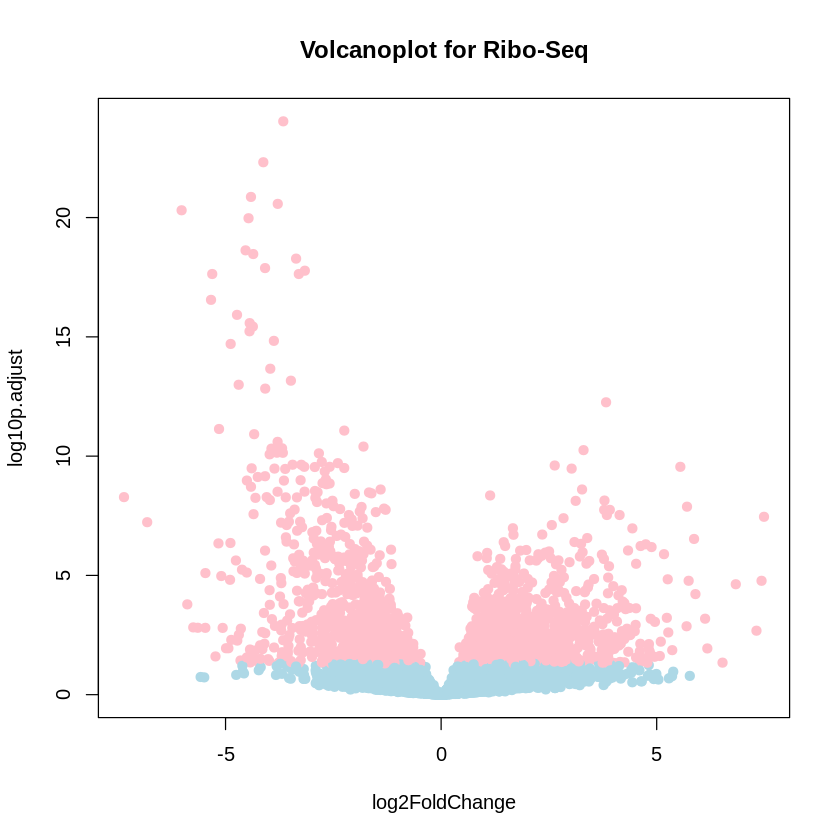

In [ ]:
alpha=-log10(0.05)
col = ifelse(-log10(itog_ribo$padj)>alpha,'pink','lightblue')
plot(x=itog_ribo$log2FoldChange,y=-log10(itog_ribo$padj),
     pch=19, col=col,xlab='log2FoldChange', ylab='log10p.adjust',
     main='Volcanoplot for Ribo-Seq')

Список диф экспрессированных генов

In [54]:
ribo <- df_clean[,rib_col]
row.names(ribo) <- df$geneID
na.omit(ribo[itog_rna$padj<0.05,])

,LC001.normal.RPF,LC001.tumor.RPF,LC033.normal.RPF,LC033.tumor.RPF,LC034.normal.RPF,LC034.tumor.RPF,LC501.normal.RPF,LC501.tumor.RPF,LC502.normal.RPF,LC502.tumor.RPF,LC505.normal.RPF,LC505.tumor.RPF,LC506.normal.RPF,LC506.tumor.RPF,LC507.normal.RPF,LC507.tumor.RPF,LC508.normal.RPF,LC508.tumor.RPF,LC509.normal.RPF,LC509.tumor.RPF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000460.16,8,43,16,76,44,14,5,27,24,42,10,71,18,103,79,225,7,167,6,61
ENSG00000000938.12,0,6,14,13,15,62,5,5,22,5,0,4,18,6,8,1,3,9,7,10
ENSG00000001036.13,195,802,124,871,414,171,194,508,262,1233,159,637,200,453,254,533,156,1633,153,284
ENSG00000001167.14,64,124,50,345,75,86,35,27,58,110,64,57,35,93,52,51,31,199,46,215
ENSG00000001561.6,94,135,66,3,176,190,59,82,57,163,110,358,90,225,164,209,121,671,72,167
ENSG00000001617.11,4,33,32,65,48,83,13,90,9,46,4,49,9,9,27,22,0,58,0,67
ENSG00000001629.9,37,37,54,118,38,140,26,52,44,72,25,96,75,111,90,59,34,138,47,60
ENSG00000001631.14,48,85,51,142,95,31,65,99,76,154,64,109,59,79,83,59,70,207,80,92


##1.4.3. Ribo-Seq*RNA-Seq 

In [ ]:

matr_o <- data.frame(condition = rep(c('normal', 'tumor'), 20), 
                     meth = rep(c("RPF", "RPF", "RNA", "RNA"), 10),  
                     row.names = colnames(df_clean))
ddf_o <- DESeqDataSetFromMatrix(countData = df_clean, colData = matr_o, 
                                design = model.matrix(~matr_o$meth*matr_o$condition))
ddf_o <- DESeq(ddf_o)
resultsNames(ddf_o)
itog_o <- results(ddf_o,name = 'matr_o.methRPF.matr_o.conditiontumor')
row.names(itog_o) <- df$geneSymbol
itog_o <- itog_o[!is.na(itog_o$padj),]


converting counts to integer mode

using supplied model matrix

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 783 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"                           
[2] "matr_o.methRPF"                      
[3] "matr_o.conditiontumor"               
[4] "matr_o.methRPF.matr_o.conditiontumor"

Список диф экспрессированных генов:

In [ ]:
rownames(itog_o[itog_o$padj<0.05,])

[1] "AKAP11"    "GRIN2D"    "NKX3-2"    "UAP1"      "EBNA1BP2"  "PNPT1"    
 [7] "DPP9"      "ADGRA3"    "TONSL"     "CDC25A"    "DMXL1"     "CDK5R1"   
[13] "TCAIM"     "LRRC19"    "RAB11B"    "POM121"    "KIAA1211L"

Volcanoplot visualisation:

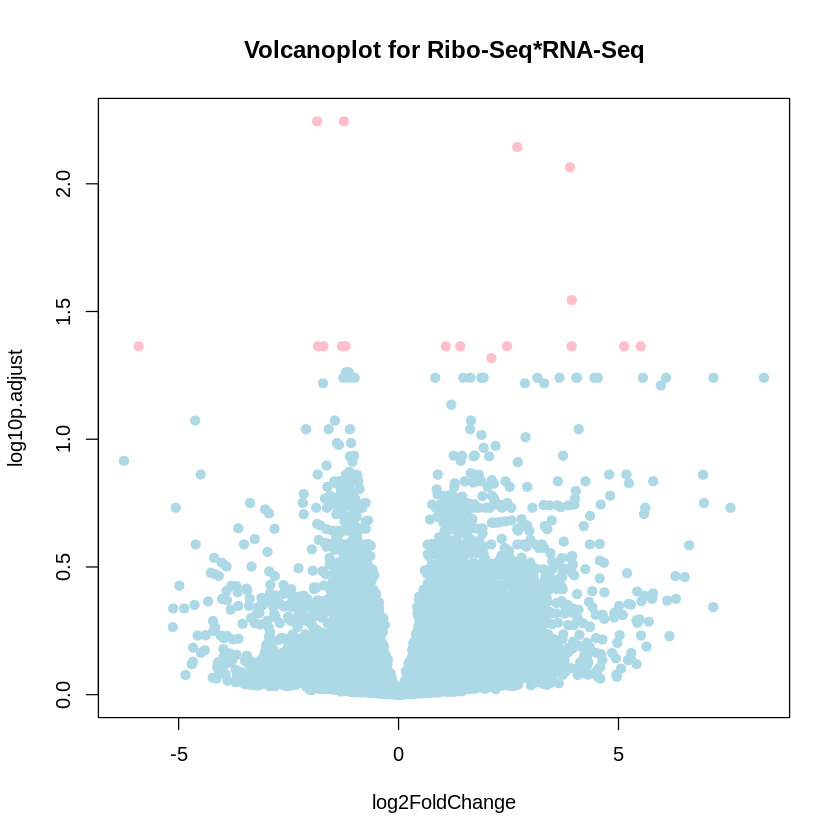

In [ ]:
alpha=-log10(0.05)
col = ifelse(-log10(itog_o$padj)>alpha,'pink','lightblue')
plot(x=itog_o$log2FoldChange,y=-log10(itog_o$padj),
     pch=19, col=col,xlab='log2FoldChange', ylab='log10p.adjust',
     main='Volcanoplot for Ribo-Seq*RNA-Seq')

Заметно, что в третьем случаекол-во диф экспрессированных генов стало меньше, потомц что на модель накладывается дополнительные условия и ограничения

# 2. Анализ wig-файла 

df_f = wig-трэки Ribo-Seq эксперимента кишечной палочки для прямой цепочки;

gen = аннотация референсного генома (U00096.3.)

In [ ]:
df_f <- read.table(file = '02. RiboSeq_EColi_track_f.wig', header = T, sep='')
gen <- read.table(file = 'Escherichia coli str. K-12.txt', h = F, sep = ';')

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”
Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”


В покрытиях нет равномерности - число каунтов для каждой позиции не равны друг другу.

Например, Возьмем ген "mog":
**U00096.3_gene_1337 [gene=rluB] [locus_TAg=b1269] [db_xref=ASAP:ABE-0004259,ECOCYC:EG12433] [location=1326852..1327727]** 
*рассмотрим его: ORF 1326852...1327727 - на прямой цепи*

In [ ]:
gen[1337, ]

,V1,V2
,<chr>,<chr>
1337,">lcl|U00096.3_gene_1337 [gene=rluB] [locus_TAg=b1269] [db_xref=ASAP:ABE-0004259,ECOCYC:EG12433] [location=1326852..1327727] [gbkey=Gene]",ATGAGCGAAAAGCTACAGAAAGTGCTGGCGCGTGCCGGCCACGGTTCTCGCCGTGAAATCGAATCTATTATTGAAGCCGGTCGTGTGAGTGTTGATGGCAAAATTGCTAAACTCGGCGATCGTGTTGAAGTTACCCCTGGATTGAAAATCCGTATCGATGGTCACCTGATTTCGGTACGTGAGTCCGCTGAACAAATTTGTCGCGTTCTGGCCTATTACAAACCGGAAGGTGAGTTGTGTACCCGTAACGATCCGGAAGGACGTCCAACGGTGTTTGACCGTCTGCCAAAACTGCGTGGCGCACGCTGGATTGCCGTGGGTCGCTTGGACGTTAATACCTGTGGTCTGCTGCTGTTCACCACCGATGGTGAACTGGCAAACCGTTTAATGCACCCAAGCCGTGAAGTTGAACGTGAATATGCCGTGCGTGTATTTGGTCAGGTTGACGACGCGAAACTGCGTGATTTGAGTCGTGGCGTGCAGTTGGAAGATGGTCCGGCAGCTTTTAAAACCATCAAGTTCAGCGGCGGCGAAGGGATCAACCAGTGGTACAACGTGACTCTGACCGAAGGCCGTAACCGTGAAGTTCGTCGTCTGTGGGAAGCGGTTGGTGTGCAGGTGAGCCGCCTGATCCGTGTTCGTTACGGTGATATCCCACTGCCAAAAGGTCTGCCACGCGGTGGCTGGACGGAGCTGGACCTCGCCCAGACTAACTATCTGCGCGAACTGGTGGAGCTACCGCCAGAAACCAGCTCTAAAGTCGCTGTAGAAAAAGACCGTCGTCGCATGAAGGCGAATCAGATTCGTCGTGCGGTGAAACGTCACAGTCAGGTGAGCGGCGGTCGTCGTTCTGGCGGACGTAATAATAACGGTTAA


In [ ]:
mog <- df_f %>% 
  filter(between(variableStep, 9306, 9893))

Рассмотри периодичность этого гена, дополним нулями показатель каунтов с пропущенными позициями

In [ ]:
mog1 <- data.frame(variableStep = 9306:9893, chrom.U00096.3 = 0)
mog1[mog1$variableStep %in% mog$variableStep, 2] <- mog$chrom.U00096.3
mog1

variableStep,chrom.U00096.3
<int>,<dbl>
9306,1
9307,0
9308,0
9309,0
9310,4
9311,6
9312,1
9313,0
9314,0


Поскольку у нас последовательности начинаются со старт кодона, проверка периодичности на каждые 3 нуклеотида должна осуществляться с 1ой позиции

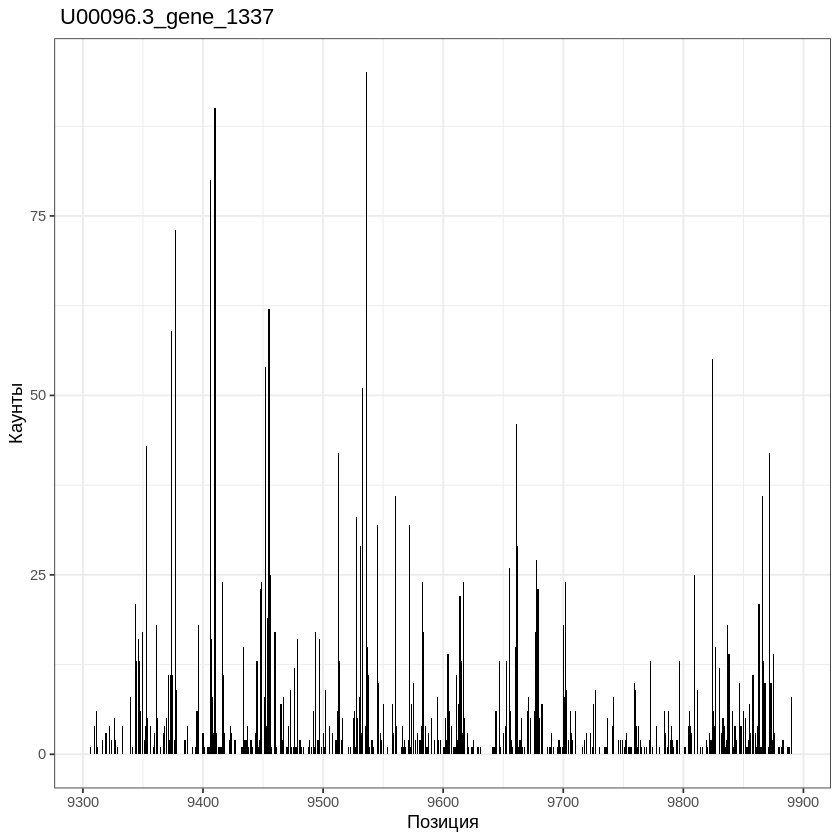

In [ ]:
ggplot(mog1, aes(x = variableStep, y = chrom.U00096.3))+
  geom_bar(stat='identity', fill = 'black')+
  labs(x = 'Позиция', y = 'Каунты', title = ' U00096.3_gene_1337')+
  theme_bw()

Cреднее по большому числу генов:

In [ ]:
x <- unlist(strsplit(gen$V1, ' '))
gen <- data.frame(name = unlist(strsplit(x[grep('U0', x)], '[|]'))[c(F,T)], 
start = as.numeric(unlist(str_extract_all(x[grep('[.][.]', x)],"[0-9]+"))[c(T,F)]), 
end = as.numeric(unlist(str_extract_all(x[grep('[.][.]', x)],"[0-9]+"))[c(F,T)]))
gen$length <- gen$end-gen$start
length(gen$name)

[1] 4639

Возьмем 60 случайных генов, заполним пропущенные позиции, приведем их к длине минимального:

In [ ]:
n <- 60 
set.seed(1000)
num <- sample(1:length(gen$name),size=n, replace = T)
gen$mean_len <- gen$start+min(gen[num, "length"])
min(gen$start[num]):max(gen$mean_len[num])
start <- sort(gen$start[num])
end <- sort(gen$mean_len[num])

pos <- c()
for (i in 1:length(start)) {
  pos <- c(pos, start[i]:end[i])
}

count_mean <- data.frame(position = pos, counts = 0)
cou <- df_f %>% 
  filter(between(variableStep, 246712, 4635640))
count_mean[count_mean$position %in% cou$variableStep, 2] <- cou$chrom.U00096.3[cou$variableStep%in%count_mean$position]
m <- matrix(ncol = 60, data = count_mean$counts, byrow = F)


[1] 246712 246713 246714 246715 246716 246717 246718 246719 246720 246721
   [11] 246722 246723 246724 246725 246726 246727 246728 246729 246730 246731
   [21] 246732 246733 246734 246735 246736 246737 246738 246739 246740 246741
   [31] 246742 246743 246744 246745 246746 246747 246748 246749 246750 246751
   [41] 246752 246753 246754 246755 246756 246757 246758 246759 246760 246761
   [51] 246762 246763 246764 246765 246766 246767 246768 246769 246770 246771
   [61] 246772 246773 246774 246775 246776 246777 246778 246779 246780 246781
   [71] 246782 246783 246784 246785 246786 246787 246788 246789 246790 246791
   [81] 246792 246793 246794 246795 246796 246797 246798 246799 246800 246801
   [91] 246802 246803 246804 246805 246806 246807 246808 246809 246810 246811
  [101] 246812 246813 246814 246815 246816 246817 246818 246819 246820 246821
  [111] 246822 246823 246824 246825 246826 246827 246828 246829 246830 246831
  [121] 246832 246833 246834 246835 246836 246837 246838 246839 246840 246841
  [131] 246842 246843 246844 246845 246846 246847 246848 246849 246850 246851
  [141] 246852 246853 246854 246855 246856 246857 246858 246859 246860 246861
  [151] 246862 246863 246864 246865 246866 246867 246868 246869 246870 246871
  [161] 246872 246873 246874 246875 246876 246877 246878 246879 246880 246881
  [171] 246882 246883 246884 246885 246886 246887 246888 246889 246890 246891
  [181] 246892 246893 246894 246895 246896 246897 246898 246899 246900 246901
  [191] 246902 246903 246904 246905 246906 246907 246908 246909 246910 246911
  [201] 246912 246913 246914 246915 246916 246917 246918 246919 246920 246921
  [211] 246922 246923 246924 246925 246926 246927 246928 246929 246930 246931
  [221] 246932 246933 246934 246935 246936 246937 246938 246939 246940 246941
  [231] 246942 246943 246944 246945 246946 246947 246948 246949 246950 246951
  [241] 246952 246953 246954 246955 246956 246957 246958 246959 246960 246961
  [251] 246962 246963 246964 246965 246966 246967 246968 246969 246970 246971
  [261] 246972 246973 246974 246975 246976 246977 246978 246979 246980 246981
  [271] 246982 246983 246984 246985 246986 246987 246988 246989 246990 246991
  [281] 246992 246993 246994 246995 246996 246997 246998 246999 247000 247001
  [291] 247002 247003 247004 247005 247006 247007 247008 247009 247010 247011
  [301] 247012 247013 247014 247015 247016 247017 247018 247019 247020 247021
  [311] 247022 247023 247024 247025 247026 247027 247028 247029 247030 247031
  [321] 247032 247033 247034 247035 247036 247037 247038 247039 247040 247041
  [331] 247042 247043 247044 247045 247046 247047 247048 247049 247050 247051
  [341] 247052 247053 247054 247055 247056 247057 247058 247059 247060 247061
  [351] 247062 247063 247064 247065 247066 247067 247068 247069 247070 247071
  [361] 247072 247073 247074 247075 247076 247077 247078 247079 247080 247081
  [371] 247082 247083 247084 247085 247086 247087 247088 247089 247090 247091
  [381] 247092 247093 247094 247095 247096 247097 247098 247099 247100 247101
  [391] 247102 247103 247104 247105 247106 247107 247108 247109 247110 247111
  [401] 247112 247113 247114 247115 247116 247117 247118 247119 247120 247121
  [411] 247122 247123 247124 247125 247126 247127 247128 247129 247130 247131
  [421] 247132 247133 247134 247135 247136 247137 247138 247139 247140 247141
  [431] 247142 247143 247144 247145 247146 247147 247148 247149 247150 247151
  [441] 247152 247153 247154 247155 247156 247157 247158 247159 247160 247161
  [451] 247162 247163 247164 247165 247166 247167 247168 247169 247170 247171
  [461] 247172 247173 247174 247175 247176 247177 247178 247179 247180 247181
  [471] 247182 247183 247184 247185 247186 247187 247188 247189 247190 247191
  [481] 247192 247193 247194 247195 247196 247197 247198 247199 247200 247201
  [491] 247202 247203 247204 247205 247206 247207 247208 247209 247210 247211
  [501] 247212 247213 247214 247215 247216 247217 247218 247219 247220 247221
  [511] 247222 247223 2472

Найдем среднее количество каунтов на каждой позиции:

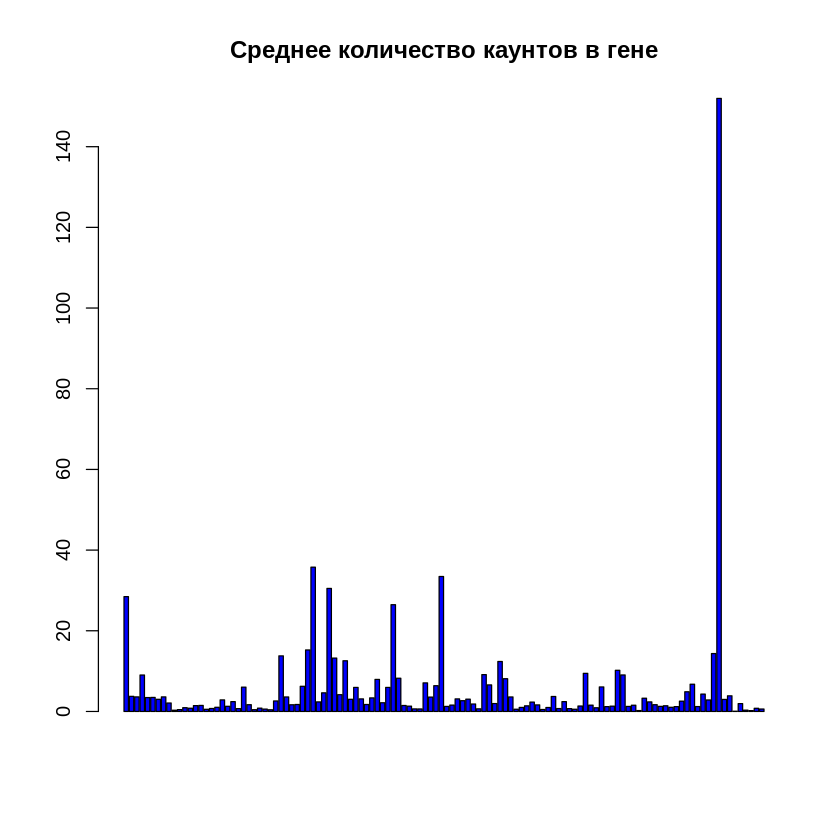

In [ ]:
c_m <- apply(m, 1, mean)
barplot(c_m, main='Среднее количество каунтов в гене', col='blue')

Не то, чтобы видна периодичность в 3 гена. Вероянтно, надо было брать все гены, может, тогда бы может она была бы видна, но вообще в реальных данных редко получаются "идеальные" картинки